In [ ]:
# -- TP2 Ciencia de Datos 
# -- HISTOGRAMAS, KERNELS & MÉTODOS NO SUPERVISADOS USANDO LA EPH

# -- Universidad de San Andrés - 2025
# -- Grupo 10: Francisca Cetra Oris de Roa, Mariano Ripoll y Justina Rivero Ayerza 

In [236]:
import os
print(os.getcwd())

C:\Users\Justina Rivero A\Desktop\Facultad UdeSA\4to año\Ciencia de datos\TP2 Datos


In [237]:
# -- Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final 

In [238]:
!pip install openpyxl 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_DIR = r"C:\Users\Justina Rivero A\Desktop\Facultad UdeSA\4to año\Ciencia de datos\TP2 Datos"
# Direccion de la carpeta con las bases de datos
# agarré esto /Users/franciscacetraorisderoa/ y le agregué donde yo se que está en mi compu

print("Intentando cargar archivos desde:", os.path.abspath(DATA_DIR))
print("Archivos en 'Datos':", os.listdir(DATA_DIR))

# Cargar bases con mensajes de estado
print("Cargando 2005 (.dta)...")
df05 = pd.read_stata(f"{DATA_DIR}/usu_individual_T105.dta", convert_categoricals=False)
print("OK 2005:", df05.shape)

print("Cargando 2025 (.xlsx)...")
df25 = pd.read_excel(f"{DATA_DIR}/usu_individual_T125.xlsx")
print("OK 2025:", df25.shape)

print("Cargando tabla adulto equivalente (.xlsx)...")
tabla_adulto_equiv = pd.read_excel(f"{DATA_DIR}/tabla_adulto_equiv.xlsx")
print("OK tabla AE:", tabla_adulto_equiv.shape)

# Mostrar las primeras filas para comprobar que cargaron ok las bases
display(df05.head(3))
display(df25.head(3))
display(tabla_adulto_equiv.head(3))

# Función para estandarizar nombres de las columnas
def estandarizar_columnas(df):
    df = df.copy()
    df.columns = [c.strip().upper().replace(" ", "_") for c in df.columns]
    return df

# Se lo aplicamos a las 3 bases
df05 = estandarizar_columnas(df05)
df25 = estandarizar_columnas(df25)
tabla_adulto_equiv = estandarizar_columnas(tabla_adulto_equiv)

# Hacemos una carpeta donde se van a guardar imagenes con las figuras
DATA_DIR = r"C:\Users\Justina Rivero A\Desktop\Facultad UdeSA\4to año\Ciencia de datos\TP2 Datos"
CARPETA_FIG = "Figuras2"

# Unir las rutas correctamente
ruta_figuras = os.path.join(DATA_DIR, CARPETA_FIG)

# Crear la carpeta si no existe
os.makedirs(ruta_figuras, exist_ok=True)
print(f"Las figuras se guardarán en: {CARPETA_FIG}/")


Archivos en 'Datos': ['.ipynb_checkpoints', 'Ciencia_Datos_TP2_Grupo10.ipynb', 'Figuras2', 'Gráfico_ClusterK-medias.png', 'tabla_adulto_equiv.xlsx', 'usu_individual_T105.dta', 'usu_individual_T125.xlsx']
Cargando 2005 (.dta)...
OK 2005: (47030, 176)
Cargando 2025 (.xlsx)...
OK 2025: (45425, 235)
Cargando tabla adulto equivalente (.xlsx)...
OK tabla AE: (39, 3)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,V21_03_M,V22_01_M,V22_02_M,V22_03_M,P_DECCF,P_RDECCF,P_GDECCF,P_PDECCF,P_IDECCF,P_ADECCF
0,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,2,1,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
1,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,3,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0
2,TQRMNOVQVHJOLOCDEFKID00875778,2025,1,1,4,0,43,S,4,927,...,0,0,0,0,3.0,2.0,3.0,NaN,3.0,2.0


,"Tabla de equivalencias de necesidades energéticas. Unidades de adulto equivalente, según sexo y edad",Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,Edad,Mujeres,Varones


Las figuras se guardarán en: Figuras2/


In [239]:
df05["ANIO"] = 2005
df25["ANIO"] = 2025

In [240]:
# Función para convertir columnas a mayúsculas
def columnas_a_mayusculas(df):
    df.columns = [col.upper() for col in df.columns]
    return df

# Aplicar a nuestras bases
df05 = columnas_a_mayusculas(df05)
df25 = columnas_a_mayusculas(df25)

# Verificamos
print(df05.columns)
print(df25.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR', 'PJ1_1', 'PJ2_1',
       'PJ3_1', 'IDIMPP', 'ANIO'],
      dtype='object', length=177)
Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'V22_01_M', 'V22_02_M', 'V22_03_M', 'P_DECCF', 'P_RDECCF', 'P_GDECCF',
       'P_PDECCF', 'P_IDECCF', 'P_ADECCF', 'ANIO'],
      dtype='object', length=236)


In [241]:
# Definición usada: GBA ≡ AGLOMERADO ∈ {32 (CABA), 33 (Partidos GBA)}
# Si no encuentra variable AGLOMERADO, usamos REGION == 1 (normalizado)

def normalizar_region(series):
    # Convierte REGION a string sin ceros a la izquierda: '01' -> '1', 1 -> '1', etc.
    return series.astype(str).str.strip().str.lstrip("0").replace({"": "0"})

def filtrar_gba(df):
    # Devuelve solo filas del Gran Buenos Aires (GBA). Preferimos AGLOMERADO (32,33). Si no existe, tomamos REGION==1.

    df = df.copy()
    if "AGLOMERADO" in df.columns:
        # Convertimos a num para tolerar '32', '32.0', etc.
        ag = pd.to_numeric(df["AGLOMERADO"], errors="coerce")
        return df[ag.isin([32, 33])]
    elif "REGION" in df.columns:
        reg = normalizar_region(df["REGION"])
        return df[reg == "1"]
    else:
        raise ValueError("No encuentro AGLOMERADO ni REGION para filtrar GBA.")

# Aplicar filtro GBA a cada base
df05_gba = filtrar_gba(df05)
df25_gba = filtrar_gba(df25)

# Agregar columna YEAR
df05_gba = df05_gba.copy()
df25_gba = df25_gba.copy()

df05 = df05_gba
df25 = df25_gba

In [242]:
# Función para limpiar columnas: quitar espacios y pasar a mayúsculas
def limpiar_columnas(df):
    df.columns = [col.strip().upper() for col in df.columns]
    return df

# Limpiamos las bases
df05 = limpiar_columnas(df05)
df25 = limpiar_columnas(df25)

# Rehacemos los conjuntos
vars05 = set(df05.columns)
vars25 = set(df25.columns)

solo_2005 = vars05 - vars25
solo_2025 = vars25 - vars05
comunes = vars05 & vars25

# Vemos variables de cada base 
print("Solo en 2005:", sorted(solo_2005))
print("Solo en 2025:", sorted(solo_2025))
print("Comunes:", sorted(comunes))

Solo en 2005: ['IDIMPP', 'PJ1_1', 'PJ2_1', 'PJ3_1', 'V11_M', 'V21_M', 'V2_M', 'V5_M']
Solo en 2025: ['CH05', 'EMPLEO', 'IMPUTA', 'PONDIH', 'PONDII', 'PONDIIO', 'PP02A', 'PP02B', 'PP02D', 'PP02F', 'PP02G', 'PP03K', 'PP04A1', 'PP05B3', 'PP05I', 'PP05J', 'PP05K', 'PP06E1', 'PP06K', 'PP06K_MES', 'PP06K_SEM', 'PP06L', 'PP07B1_01', 'PP07F1_1', 'PP07F1_2', 'PP07F1_3', 'PP07I2', 'PP07I3', 'PP07I4', 'PP07L', 'PP07M', 'PP08G', 'PP08G_DMES', 'PP08G_DSEM', 'PP08H', 'PP10B1', 'PP10B10', 'PP10B2', 'PP10B3', 'PP10B4', 'PP10B5', 'PP10B6', 'PP10B7', 'PP10B8', 'PP10B9', 'PP11L2', 'P_ADECCF', 'P_DECCF', 'P_GDECCF', 'P_IDECCF', 'P_PDECCF', 'P_RDECCF', 'SECTOR', 'V11_01_M', 'V11_02_M', 'V21_01_M', 'V21_02_M', 'V21_03_M', 'V22_01_M', 'V22_02_M', 'V22_03_M', 'V2_01_M', 'V2_02_M', 'V2_03_M', 'V5_01_M', 'V5_02_M', 'V5_03_M']
Comunes: ['ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'ANIO', 'ANO4', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13'

In [243]:
# --- Eliminar columnas innecesarias en df05 ---
cols_a_eliminar_05 = ['IDIMPP', 'PJ1_1', 'PJ2_1', 'PJ3_1']
df05 = df05.drop(columns=[col for col in cols_a_eliminar_05 if col in df05.columns])

# --- Homologar variables en df25 ---
# V11_M en 2025
if set(['V11_01_M','V11_02_M']).issubset(df25.columns):
    df25['V11_M'] = df25[['V11_01_M', 'V11_02_M']].sum(axis=1)
    df25 = df25.drop(columns=['V11_01_M','V11_02_M'])

# V2_M en 2025
cols_v2 = ['V21_01_M','V22_01_M','V21_02_M','V22_02_M','V21_03_M','V22_03_M']
cols_v2_exist = [c for c in cols_v2 if c in df25.columns]
if cols_v2_exist:
    df25['V2_M'] = df25[cols_v2_exist].sum(axis=1)
    df25 = df25.drop(columns=cols_v2_exist)

# V5_M en 2025
cols_v5 = ['V5_01_M','V5_02_M','V5_03_M']
cols_v5_exist = [c for c in cols_v5 if c in df25.columns]
if cols_v5_exist:
    df25['V5_M'] = df25[cols_v5_exist].sum(axis=1)
    df25 = df25.drop(columns=cols_v5_exist)

# --- Revisar diferencias ---
vars05 = set(df05.columns)
vars25 = set(df25.columns)

solo_2005 = vars05 - vars25
solo_2025 = vars25 - vars05
comunes = vars05 & vars25

print("Solo en 2005:", sorted(solo_2005))
print("Solo en 2025:", sorted(solo_2025))
print("Comunes:", len(comunes))

Solo en 2005: ['V21_M']
Solo en 2025: ['CH05', 'EMPLEO', 'IMPUTA', 'PONDIH', 'PONDII', 'PONDIIO', 'PP02A', 'PP02B', 'PP02D', 'PP02F', 'PP02G', 'PP03K', 'PP04A1', 'PP05B3', 'PP05I', 'PP05J', 'PP05K', 'PP06E1', 'PP06K', 'PP06K_MES', 'PP06K_SEM', 'PP06L', 'PP07B1_01', 'PP07F1_1', 'PP07F1_2', 'PP07F1_3', 'PP07I2', 'PP07I3', 'PP07I4', 'PP07L', 'PP07M', 'PP08G', 'PP08G_DMES', 'PP08G_DSEM', 'PP08H', 'PP10B1', 'PP10B10', 'PP10B2', 'PP10B3', 'PP10B4', 'PP10B5', 'PP10B6', 'PP10B7', 'PP10B8', 'PP10B9', 'PP11L2', 'P_ADECCF', 'P_DECCF', 'P_GDECCF', 'P_IDECCF', 'P_PDECCF', 'P_RDECCF', 'SECTOR', 'V2_01_M', 'V2_02_M', 'V2_03_M']
Comunes: 172


In [244]:
# Columnas que queremos mantener aunque aparezcan solo en 2025
excepciones = ['IMPUTA', 'PONDIH', 'PONDIIO', 'PONDII']

# Columnas a eliminar: solo las de 2025 que no están en 2005 y no son excepciones
cols_a_eliminar = [col for col in solo_2025 if col not in excepciones]
df25 = df25.drop(columns=cols_a_eliminar)

# --- Paso 2: homologar las excepciones ---
# Primero vemos si existen diferencias mínimas en nombres en 2005
for col in excepciones:
    cols05_similares = [c for c in df05.columns if col in c.upper()]
    cols25_similares = [c for c in df25.columns if col in c.upper()]
    
    # Si hay una columna en 2025 con sufijo diferente, sumamos o renombramos
    if len(cols25_similares) > 1:
        df25[col] = df25[cols25_similares].sum(axis=1)
        df25 = df25.drop(columns=cols25_similares)
    elif len(cols25_similares) == 1:
        # Renombramos a la columna "base" para que coincida con 2005
        df25 = df25.rename(columns={cols25_similares[0]: col})

# --- Paso 3: revisar columnas ---
vars05 = set(df05.columns)
vars25 = set(df25.columns)

solo_2005 = vars05 - vars25
solo_2025 = vars25 - vars05
comunes = vars05 & vars25

print("Columnas solo en 2005:", sorted(solo_2005))
print("Columnas solo en 2025:", sorted(solo_2025))
print("Columnas comunes:", sorted(comunes))

Columnas solo en 2005: ['V21_M']
Columnas solo en 2025: ['IMPUTA', 'PONDIH']
Columnas comunes: ['ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'ANIO', 'ANO4', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'CODUSU', 'COMPONENTE', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'IPCF', 'ITF', 'MAS_500', 'NIVEL_ED', 'NRO_HOGAR', 'P21', 'P47T', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PONDERA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04B2', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04B3_MES', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05B2_MES', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05

In [245]:
# --- Paso 0: REEMPLAZAR ANO4 si existe ---
df05 = df05.rename(columns={'ANIO': 'YEAR'})
df25 = df25.rename(columns={'ANIO': 'YEAR'})
df05 = df05.rename(columns={'ANO4': 'YEAR'})
df25 = df25.rename(columns={'ANO4': 'YEAR'})


# --- Paso 1: renombrar CODUSU como ID ---
df05 = df05.rename(columns={'CODUSU': 'ID'})
df25 = df25.rename(columns={'CODUSU': 'ID'})

# --- Paso 2: columnas comunes después de homologaciones ---
vars05 = set(df05.columns)
vars25 = set(df25.columns)
comunes = sorted(vars05 & vars25)

# --- Paso 3: seleccionar solo las columnas comunes (incluyendo ID) ---
columnas_seleccionadas = ['ID'] + [c for c in comunes if c != 'ID']
df05_sel = df05[columnas_seleccionadas]
df25_sel = df25[columnas_seleccionadas]

# --- Paso 4: concatenar verticalmente todas las filas ---
df_final = pd.concat([df05_sel, df25_sel], ignore_index=True)

# --- Paso extra: corregir columnas duplicadas de YEAR ---

# Eliminamos columnas duplicadas por nombre (YEAR aparece dos veces)
df_final = df_final.loc[:, ~df_final.columns.duplicated()]

# Asegurar que YEAR quede número entero
df_final["YEAR"] = pd.to_numeric(df_final["YEAR"], errors="coerce").astype("Int64")

# Chequeo rápido
print("Columnas después de corregir duplicados:", df_final.columns.tolist())
display(df_final.head())

# --- Paso 5: revisar la base final ---
print("Dimensiones de la base final:", df_final.shape)
print("Columnas de la base final:", df_final.columns.tolist())
print("Primeras filas:")
print(df_final.head())

# Chequear los valores de la columna YEAR (para ver que no se haya perdido alguno de los dos años en lo que hicimos de borrar duplicados)
print("Años presentes en la base final:", df_final["YEAR"].unique())
print("Cantidad de observaciones por año:")
print(df_final["YEAR"].value_counts())


Columnas después de corregir duplicados: ['ID', 'ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'COMPONENTE', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'IPCF', 'ITF', 'MAS_500', 'NIVEL_ED', 'NRO_HOGAR', 'P21', 'P47T', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PONDERA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04B2', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04B3_MES', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05B2_MES', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A'

,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V12_M,V18_M,V19_AM,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR
0,125098,05,02,04,,32.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,583.0,0.0,0.0,0.0,0.0,0.0,2005
1,125188,01,02,03,02,32.0,0.0,2.0,1.0,1.0,...,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
2,125188,01,02,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
3,125188,01,02,00,,32.0,5.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
4,125242,07,03,06,,32.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,575.0,0.0,0.0,0.0,0.0,0.0,2005


Dimensiones de la base final: (16665, 171)
Columnas de la base final: ['ID', 'ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'COMPONENTE', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'IPCF', 'ITF', 'MAS_500', 'NIVEL_ED', 'NRO_HOGAR', 'P21', 'P47T', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PONDERA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04B2', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04B3_MES', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05B2_MES', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06

In [246]:
# --- Paso 1: definir los códigos a eliminar ---
codigos_ns_nr = [9, 99, 999, 9999]

# --- Paso 2: reemplazar los códigos NS/NR por NaN ---
df_limpia = df_final.replace(codigos_ns_nr, np.nan)

# --- Paso 3: eliminar filas con cualquier NaN ---
df_limpia = df_limpia.dropna()

# --- Paso 4: revisar dimensiones y primeras filas ---
print("Dimensiones después de limpieza:", df_limpia.shape)
print("Primeras filas:")
print(df_limpia.head())

Dimensiones después de limpieza: (7751, 171)
Primeras filas:
         ID ADECCFR ADECIFR ADECINDR ADECOCUR  AGLOMERADO  CAT_INAC  CAT_OCUP  \
0  125098        05      02       04                 32.0       1.0       0.0   
1  125188        01      02       03       02        32.0       0.0       2.0   
2  125188        01      02       00                 32.0       4.0       0.0   
3  125188        01      02       00                 32.0       5.0       0.0   
4  125242        07      03       06                 32.0       1.0       0.0   

   CH03  CH04  ...  V12_M  V18_M  V19_AM   V2_M  V3_M  V4_M  V5_M  V8_M V9_M  \
0   1.0   1.0  ...    0.0    0.0     0.0  583.0   0.0   0.0   0.0   0.0  0.0   
1   1.0   1.0  ...  150.0    0.0     0.0    0.0   0.0   0.0   0.0   0.0  0.0   
2   2.0   2.0  ...    0.0    0.0     0.0    0.0   0.0   0.0   0.0   0.0  0.0   
3   3.0   2.0  ...    0.0    0.0     0.0    0.0   0.0   0.0   0.0   0.0  0.0   
4   1.0   2.0  ...    0.0    0.0     0.0  575.0   0.

In [247]:
#Vamos con el primer punto. Para eso tenemos que volver a definir POBRE, ingreso_necesario, Filtrar por los que respondieron ITF, etc

In [248]:
# Filtrar los que respondieron (ITF ≠ 0), guardamos una COPIA filtrada del df_final
respondieron = df_final[df_final["ITF"] != 0].copy()
#vemos si salió bien
respondieron.head(3)
# Filtrar los que NO respondieron (ITF = 0)
norespondieron = df_final[df_final["ITF"] == 0].copy()
#vemos si salió bien
norespondieron.head(3)


,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V12_M,V18_M,V19_AM,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR
489,155508,00,00,00,,32.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
490,155508,00,00,00,,32.0,3.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005
491,155508,00,00,00,,32.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005


In [249]:
#Arreglo tabla_adulto_equiv
#La tabla la carga raro, asi que tenemos que decirle qué usar de head y eliminar los NaN
print("Cargando tabla adulto equivalente (.xlsx)...")
tabla_adulto_equiv_cruda = pd.read_excel(f"{DATA_DIR}/tabla_adulto_equiv.xlsx", header=None)
#identifico la fila donde está "Edad" y la guardo en head
header_edad = tabla_adulto_equiv_cruda[tabla_adulto_equiv_cruda.iloc[:,0]=="Edad"].index[0]
#vuelvo a guardar la tabla, ahora usando el header
tabla_adulto_equiv = pd.read_excel(f"{DATA_DIR}/tabla_adulto_equiv.xlsx", header=header_edad)
#saco los NaN
tabla_adulto_equiv = tabla_adulto_equiv[tabla_adulto_equiv["Edad"].notna()].reset_index(drop=True)
print("OK tabla AE:", tabla_adulto_equiv.shape)

#identifico la fila donde está "Edad" y la guardo en head
header_edad = tabla_adulto_equiv_cruda[tabla_adulto_equiv_cruda.iloc[:,0]=="Edad"].index[0]
#vuelvo a guardar la tabla, ahora usando el header
tabla_adulto_equiv = pd.read_excel(f"{DATA_DIR}/tabla_adulto_equiv.xlsx", header=header_edad)
#saco los NaN
tabla_adulto_equiv = tabla_adulto_equiv[tabla_adulto_equiv["Edad"].notna()].reset_index(drop=True)
print("OK tabla AE:", tabla_adulto_equiv.shape)


Cargando tabla adulto equivalente (.xlsx)...
OK tabla AE: (29, 3)
OK tabla AE: (29, 3)


In [250]:
tabla_adulto_equiv.head(25) #ver que todo ande bien

,Edad,Mujeres,Varones
0,Menor de 1 año,0.35,0.35
1,1año,0.37,0.37
2,2 años,0.46,0.46
3,3 años,0.51,0.51
4,4 años,0.55,0.55
5,5 años,0.60,0.60
6,6 años,0.64,0.64
7,7 años,0.66,0.66
8,8 años,0.68,0.68
9,9 años,0.69,0.69


In [251]:
# Encontrar el índice de la fila donde EDAD es "más de 75 años"
idx_max = tabla_adulto_equiv[tabla_adulto_equiv['Edad'] == "más de 75 años"].index[0]

# Tomar solo hasta esa fila inclusive
tabla_adulto_equiv_recortada = tabla_adulto_equiv.loc[:idx_max].copy()

print(tabla_adulto_equiv_recortada)

              Edad  Mujeres  Varones
0   Menor de 1 año     0.35     0.35
1             1año     0.37     0.37
2           2 años     0.46     0.46
3           3 años     0.51     0.51
4           4 años     0.55     0.55
5           5 años     0.60     0.60
6           6 años     0.64     0.64
7           7 años     0.66     0.66
8           8 años     0.68     0.68
9           9 años     0.69     0.69
10         10 años     0.70     0.79
11         11 años     0.72     0.82
12         12 años     0.74     0.85
13         13 años     0.76     0.90
14         14 años     0.76     0.96
15         15 años     0.77     1.00
16         16 años     0.77     1.03
17         17 años     0.77     1.04
18    18 a 29 años     0.76     1.02
19    30 a 45 años     0.77     1.00
20    46 a 60 años     0.76     1.00
21    61 a 75 años     0.67     0.83
22  más de 75 años     0.63     0.74


In [252]:
#Quiero que en EDAD solo queden numeros y que quede una fila por cada edad de 0-100
def expand_edad(row):
    edad_str = row['Edad'].replace("años", "").replace("año", "").strip()
    
    # "<1 año"
    if edad_str.startswith("Menor de"):
        return [0]
    
    # ">75 años"
    elif edad_str.startswith("más de"):
        return list(range(75, 101))  # de 75 a 100
    
    # Rango "18 a 29"
    elif "a" in edad_str:
        partes = edad_str.split("a")
        start = int(partes[0].strip())
        end = int(partes[1].strip())
        return list(range(start, end + 1))
    
    # Edad única "2"
    else:
        return [int(edad_str.strip())]

# Repetir filas según cantidad de edades en cada rango
tabla_expanded = tabla_adulto_equiv_recortada.loc[
    tabla_adulto_equiv_recortada.index.repeat(
        tabla_adulto_equiv_recortada.apply(lambda row: len(expand_edad(row)), axis=1)
    )
].copy()

# Expandir la columna EDAD para tener una fila por año de edad del 0 al 100
tabla_expanded['Edad'] = [
    edad
    for idx, row in tabla_adulto_equiv_recortada.iterrows()
    for edad in expand_edad(row)
]

# Convertir a int
tabla_expanded['Edad'] = tabla_expanded['Edad'].astype(int)

# Re-enumeramos el índice porque se estaba viendo repetido a partir del 18
tabla_expanded = tabla_expanded.reset_index(drop=True)

print(tabla_expanded)
tabla_expanded.head(50)

     Edad  Mujeres  Varones
0       0     0.35     0.35
1       1     0.37     0.37
2       2     0.46     0.46
3       3     0.51     0.51
4       4     0.55     0.55
..    ...      ...      ...
97     96     0.63     0.74
98     97     0.63     0.74
99     98     0.63     0.74
100    99     0.63     0.74
101   100     0.63     0.74

[102 rows x 3 columns]


,Edad,Mujeres,Varones
0,0,0.35,0.35
1,1,0.37,0.37
2,2,0.46,0.46
3,3,0.51,0.51
4,4,0.55,0.55
5,5,0.60,0.60
6,6,0.64,0.64
7,7,0.66,0.66
8,8,0.68,0.68
9,9,0.69,0.69


In [253]:
# Primero, renombramos columnas para simplificar
df_personas = df_final.copy()
df_personas['Edad'] = df_personas['CH06'].astype(float)

print(tabla_expanded.columns)
#renombro columnas para q sea mas claro
#hago merge x EDAD
tabla_consumo = tabla_expanded.rename(columns={'Mujeres':'consumo_mujer','Varones':'consumo_varon'})
df_merge = df_personas.merge(tabla_consumo[['Edad','consumo_mujer','consumo_varon']], 
                             on='Edad', how='left')
# Creamos la columna adulto_equiv seleccionando el consumo según sexo
# CH04 == 1 → varón, CH04 == 2 → mujer

#Agrego al df la columna adulto_equiv
df_merge['adulto_equiv'] = np.where(df_merge['CH04'] == 1,
                                    df_merge['consumo_varon'],
                                    df_merge['consumo_mujer'])


Index(['Edad', 'Mujeres', 'Varones'], dtype='object')


In [254]:
df_merge.head(10) #chequeo que este bien

,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR,Edad,consumo_mujer,consumo_varon,adulto_equiv
0,125098,05,02,04,,32.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,80.0,0.63,0.74,0.74
1,125188,01,02,03,02,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,26.0,0.76,1.02,1.02
2,125188,01,02,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,1.02,0.76
3,125188,01,02,00,,32.0,5.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,-1.0,NaN,NaN,NaN
4,125242,07,03,06,,32.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,71.0,0.67,0.83,0.67
5,125436,08,10,10,10,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,54.0,0.76,1.00,1.00
6,125436,08,10,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,54.0,0.76,1.00,0.76
7,125436,08,10,00,,32.0,7.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,1.02,0.76
8,125436,08,10,01,,32.0,0.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,20.0,0.76,1.02,1.02
9,125436,08,10,00,,32.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,18.0,0.76,1.02,0.76


In [255]:
#elimino las columnas consumo_varon/mujer
df_final_con_equiv = df_merge.drop(columns=['consumo_varon','consumo_mujer','key_0'], errors='ignore')

In [256]:
#al df entero le agrego una columna y le asigno el valor de sumar los valores de adulto_equiv agrupado por codusu.
#el observe=False es para evitar el future warning de modificar la base original
df_final_con_equiv['ad_equiv_hogar'] = df_final_con_equiv.groupby('ID', observed=False)['adulto_equiv'].transform('sum').copy()

#Me agrega "ad_equiv_hogar_x	ad_equiv_hogar_y" y no las quiero asi que las elimino
df_final_con_equiv = df_final_con_equiv.drop(columns=['ad_equiv_hogar_x','ad_equiv_hogar_y'], errors='ignore')

#chequeo que esté
df_final_con_equiv.head(10)
#está!! :) 

,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR,Edad,adulto_equiv,ad_equiv_hogar
0,125098,05,02,04,,32.0,1.0,0.0,1.0,1.0,...,583.0,0.0,0.0,0.0,0.0,0.0,2005,80.0,0.74,0.74
1,125188,01,02,03,02,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,26.0,1.02,1.78
2,125188,01,02,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,1.78
3,125188,01,02,00,,32.0,5.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,-1.0,NaN,1.78
4,125242,07,03,06,,32.0,1.0,0.0,1.0,2.0,...,575.0,0.0,0.0,0.0,0.0,0.0,2005,71.0,0.67,0.67
5,125436,08,10,10,10,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,54.0,1.00,4.30
6,125436,08,10,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,54.0,0.76,4.30
7,125436,08,10,00,,32.0,7.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,4.30
8,125436,08,10,01,,32.0,0.0,3.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,20.0,1.02,4.30
9,125436,08,10,00,,32.0,3.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,18.0,0.76,4.30


In [257]:
df_final = df_final_con_equiv

In [258]:
print(df_final['YEAR'].dtype)
print(df_final["ad_equiv_hogar"].dtype)
df_final.head(5)

Int64
float64


,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V2_M,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR,Edad,adulto_equiv,ad_equiv_hogar
0,125098,05,02,04,,32.0,1.0,0.0,1.0,1.0,...,583.0,0.0,0.0,0.0,0.0,0.0,2005,80.0,0.74,0.74
1,125188,01,02,03,02,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,26.0,1.02,1.78
2,125188,01,02,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,1.78
3,125188,01,02,00,,32.0,5.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2005,-1.0,NaN,1.78
4,125242,07,03,06,,32.0,1.0,0.0,1.0,2.0,...,575.0,0.0,0.0,0.0,0.0,0.0,2005,71.0,0.67,0.67


In [259]:
coinciden = df_final['ID'].isin(respondieron['ID'])
print("Cantidad de personas que respondieron:", coinciden.sum())
print("Cantidad de personas que NO respondieron:", (~coinciden).sum())

Cantidad de personas que respondieron: 13776
Cantidad de personas que NO respondieron: 3002


In [260]:
#7. usando base "respondieron" y la nueva df_final con ad_equiv

#vuelvo a hacer una base llamada respondieron pero con la utlima versión del df_final
respondieron = df_final[df_final["ITF"] != 0].copy()
respondieron.head(10)

#var booleana que da True si se cumplen las condiciones:
# 1. el hogar (CODUSU) está en respondieron y coincide con el de df_final
# 2. el año es 2025
mask_2025 = (df_final['ID'].isin(respondieron['ID'])) & (df_final['YEAR'] == 2025)
#var booleana que da True si se cumplen las condiciones:
# 1. el hogar (CODUSU) está en respondieron y coincide con el de df_final
# 2. el año es 2005
mask_2005 = (df_final['ID'].isin(respondieron['ID'])) & (df_final['YEAR'] == 2005)

# selecciona los datos donde mask_año es True y crea la columna ingreso_necesario
# le asigna el valor de ad_equiv_hogar multiplicado, solo cuando mask_año es True
df_final.loc[mask_2025, 'ingreso_necesario'] = df_final.loc[mask_2025, 'ad_equiv_hogar'] * 365177.00
df_final.loc[mask_2005, 'ingreso_necesario'] = df_final.loc[mask_2005, 'ad_equiv_hogar'] * 205.07

#Había que agregarla a respondieron:
respondieron.loc[mask_2025, 'ingreso_necesario'] = respondieron.loc[mask_2025, 'ad_equiv_hogar'] * 365177.00
respondieron.loc[mask_2005, 'ingreso_necesario'] = respondieron.loc[mask_2005, 'ad_equiv_hogar'] * 205.07

respondieron.head(-5)

,ID,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,CAT_INAC,CAT_OCUP,CH03,CH04,...,V3_M,V4_M,V5_M,V8_M,V9_M,YEAR,Edad,adulto_equiv,ad_equiv_hogar,ingreso_necesario
0,125098,05,02,04,,32.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,80.0,0.74,0.74,1.517518e+02
1,125188,01,02,03,02,32.0,0.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2005,26.0,1.02,1.78,3.650246e+02
2,125188,01,02,00,,32.0,4.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,27.0,0.76,1.78,3.650246e+02
3,125188,01,02,00,,32.0,5.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,-1.0,NaN,1.78,3.650246e+02
4,125242,07,03,06,,32.0,1.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2005,71.0,0.67,0.67,1.373969e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16755,TQRMNOUUWHLMLMCDEIJAH00882462,1,1,0,0,33.0,3.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2025,12.0,0.85,3.13,1.143004e+06
16762,TQRMNOPWYHLMPUCDEIJAH00855321,6,4,7,5,33.0,0.0,3.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2025,40.0,0.77,1.46,5.331584e+05
16763,TQRMNOPWYHLMPUCDEIJAH00855321,6,4,0,0,33.0,3.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2025,9.0,0.69,1.46,5.331584e+05
16764,TQRMNOUSSHMKPRCDEIJAH00882495,3,5,6,2,33.0,0.0,3.0,1.0,2.0,...,0.0,0.0,124000.0,0.0,0.0,2025,45.0,0.77,3.20,1.168566e+06


In [261]:
#esta var booleana va a ser True si el ITF es menor al ingreso necesario y el año es 2025
pobre25 = (respondieron["ITF"]< respondieron["ingreso_necesario"]) & (respondieron["YEAR"]==2025)
pobre25=pobre25.astype(int)
#.astype(int) es para que sea 1 si es True y 0 si es False

#IDEM 2005
pobre05 = (respondieron["ITF"]< respondieron["ingreso_necesario"]) & (respondieron["YEAR"]==2005)
pobre05=pobre05.astype(int)

#a los datos que en respondieron tienen YEAR=2025, les asigno el valor de pobre25 en una nueva columna llamada pobre
respondieron.loc[respondieron['YEAR'] == 2025, 'pobre'] = pobre25[respondieron['YEAR'] == 2025]

respondieron.loc[respondieron['YEAR'] == 2005, 'pobre'] = pobre05[respondieron['YEAR'] == 2005]

In [262]:
# Cantidad de pobres por año
pobres_por_año = respondieron.groupby('YEAR')['pobre'].sum()

# Total de personas por año
total_por_año = respondieron.groupby('YEAR')['pobre'].count()

# Porcentaje de pobres por año
porcentaje_pobres = (pobres_por_año / total_por_año) * 100

#ahí un print para que diga los resultados :)
for YEAR in pobres_por_año.index:
    print(f"La cantidad de pobres en {YEAR} es: {pobres_por_año[YEAR]}")
    print(f"El total de personas en {YEAR} es: {total_por_año[YEAR]}")
    print(f"El porcentaje de pobres en {YEAR} es: {porcentaje_pobres[YEAR]:.2f}%\n")

print("Este n tan diferente en 2005 y 2025 debe tener que ver con la limpieza de datos, pero se ve un aumento en la proporción de pobres entre 2005 y 2025.")

La cantidad de pobres en 2005 es: 2505.0
El total de personas en 2005 es: 9429
El porcentaje de pobres en 2005 es: 26.57%

La cantidad de pobres en 2025 es: 1369.0
El total de personas en 2025 es: 4346
El porcentaje de pobres en 2025 es: 31.50%

Este n tan diferente en 2005 y 2025 debe tener que ver con la limpieza de datos, pero se ve un aumento en la proporción de pobres entre 2005 y 2025.


In [263]:
# Crear la variable POBRE solo en respondieron
respondieron['POBRE'] = (respondieron['ITF'] < respondieron['ingreso_necesario']).astype(int)

# Ahora, si querés que POBRE también esté en df_final:
df_final = df_final.merge(
    respondieron[['ID', 'YEAR', 'POBRE']],  # solo columnas necesarias
    on=['ID', 'YEAR'], 
    how='left'
)

In [264]:
print(df_final[df_final['POBRE'] == 1].head(10))
#chequeando

           ID ADECCFR ADECIFR ADECINDR ADECOCUR  AGLOMERADO  CAT_INAC  \
40   125533        03      04       03       02        32.0       0.0   
45   125533        03      04       03       02        32.0       0.0   
50   125533        03      04       00                 32.0       7.0   
55   125533        03      04       04                 32.0       1.0   
60   125533        01      01       01       01        32.0       0.0   
457  134256        01      01       01       01        32.0       0.0   
458  134256        01      01       01       01        32.0       0.0   
459  134256        01      01       01       01        32.0       0.0   
460  134256        01      01       01                 32.0       4.0   
461  134256        01      01       01                 32.0       4.0   

     CAT_OCUP  CH03  CH04  ...  V4_M  V5_M  V8_M  V9_M  YEAR  Edad  \
40        2.0   1.0   1.0  ...   0.0   0.0   0.0   0.0  2005  75.0   
45        2.0   1.0   1.0  ...   0.0   0.0   0.0   0.0  

In [265]:
df_final['edad2'] = df_final['Edad'] ** 2
print(df_final.head())

         ID ADECCFR ADECIFR ADECINDR ADECOCUR  AGLOMERADO  CAT_INAC  CAT_OCUP  \
0  125098        05      02       04                 32.0       1.0       0.0   
1  125188        01      02       03       02        32.0       0.0       2.0   
2  125188        01      02       03       02        32.0       0.0       2.0   
3  125188        01      02       03       02        32.0       0.0       2.0   
4  125188        01      02       00                 32.0       4.0       0.0   

   CH03  CH04  ...  V5_M  V8_M  V9_M  YEAR  Edad  adulto_equiv  \
0   1.0   1.0  ...   0.0   0.0   0.0  2005  80.0          0.74   
1   1.0   1.0  ...   0.0   0.0   0.0  2005  26.0          1.02   
2   1.0   1.0  ...   0.0   0.0   0.0  2005  26.0          1.02   
3   1.0   1.0  ...   0.0   0.0   0.0  2005  26.0          1.02   
4   2.0   2.0  ...   0.0   0.0   0.0  2005  27.0          0.76   

   ad_equiv_hogar  ingreso_necesario POBRE   edad2  
0            0.74           151.7518   0.0  6400.0  
1         

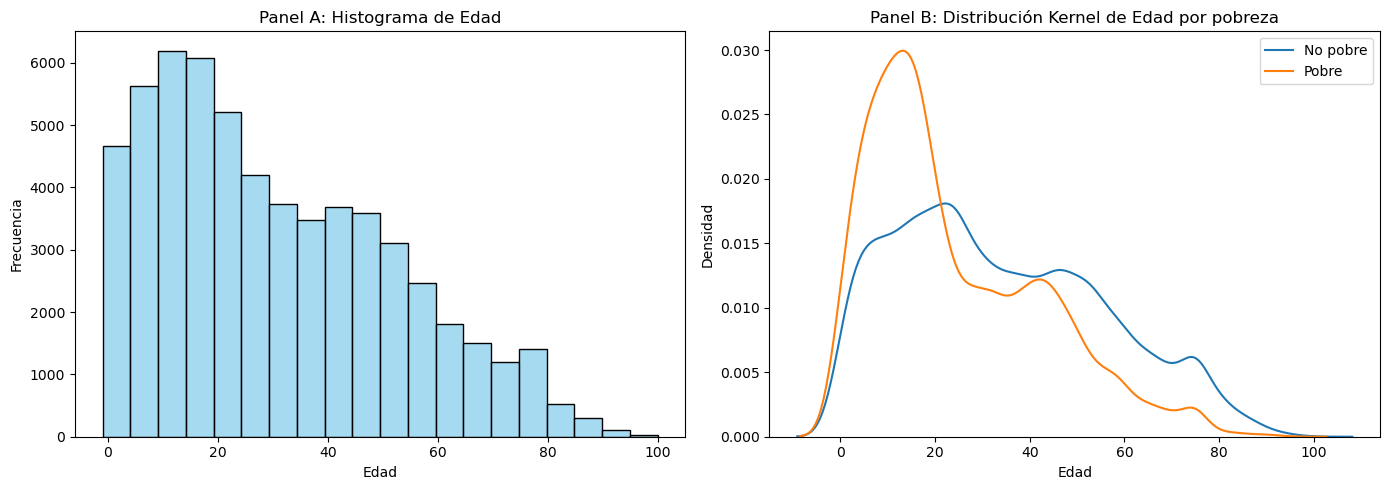

In [266]:
# --- Configurar figura con 2 paneles ---
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# --- Panel A: Histograma de edad ---
sns.histplot(df_final['CH06'], bins=20, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Panel A: Histograma de Edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# --- Panel B: Kernel density por pobreza ---
sns.kdeplot(data=df_final[df_final['POBRE'] == 0], x='CH06', label='No pobre', ax=axes[1])
sns.kdeplot(data=df_final[df_final['POBRE'] == 1], x='CH06', label='Pobre', ax=axes[1])
axes[1].set_title('Panel B: Distribución Kernel de Edad por pobreza')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(ruta_figuras, "histogramaEdadyKernelPobre.png"), dpi=150, bbox_inches="tight")
plt.show()

In [267]:
print(df_final['CH12'].head(10))

0    4.0
1    4.0
2    4.0
3    4.0
4    6.0
5    6.0
6    6.0
7    0.0
8    0.0
9    0.0
Name: CH12, dtype: float64


In [268]:
import pandas as pd
import numpy as np

# --- convertir CH14 a numérico (los que no se puedan convertir quedan NaN) ---
df_final['CH14'] = pd.to_numeric(df_final['CH14'], errors='coerce')

# --- eliminar los códigos de educación especial ---
df_final.loc[df_final['CH14'] == 98, 'CH14'] = np.nan

# --- Función para calcular años de educación ---
def calcular_educ(row):
    nivel = row['CH12']
    completo = row['CH13']
    ultimo = row['CH14']
    
    # Si algún dato falta
    if pd.isna(nivel) or pd.isna(completo):
        return np.nan
    
    # Educación especial o CH14=98 → NaN
    if nivel == 9 or ultimo == 98:
        return np.nan
    
    # Si completó el nivel
    if completo == 1:
        if nivel == 1: return 0      # jardín
        elif nivel == 2: return 6    # primaria completa
        elif nivel == 3: return 9    # EGB completa
        elif nivel in [4,5]: return 12 # secundario/polimodal completo
        elif nivel == 6: return 15   # terciario completo
        elif nivel == 7: return 16   # universitario completo
        elif nivel == 8: return 18   # posgrado completo
    
    # Si NO completó el nivel → sumamos años previos + CH14
    if completo == 2:
        if nivel == 1: return 0
        elif nivel == 2: return ultimo                # primaria incompleta
        elif nivel == 3: return 6 + ultimo           # EGB incompleta
        elif nivel in [4,5]: return 6 + ultimo      # secundario/polimodal incompleto
        elif nivel == 6: return 12 + ultimo         # terciario incompleto
        elif nivel == 7: return 12 + ultimo         # universitario incompleto
        elif nivel == 8: return 16 + ultimo         # posgrado incompleto
    
    return np.nan

# --- Aplicar la función ---
df_final['educ'] = df_final.apply(calcular_educ, axis=1)

In [269]:
# Definimos el máximo plausible
max_educ = 20

# Reemplazamos los valores mayores por NaN
df_final.loc[df_final['educ'] > max_educ, 'educ'] = np.nan

# Revisamos de nuevo estadísticas descriptivas
desc_educ = df_final['educ'].describe(percentiles=[0.5])
print(desc_educ[['mean', 'std', 'min', '50%', 'max']])

mean     9.052561
std      4.389938
min      0.000000
50%      9.000000
max     19.000000
Name: educ, dtype: float64


In [270]:
#3.
factor_actualizacion = 135768.99 / 100  # 1357.6899

# Crear nueva columna de ingreso total actualizado
df_final['ingreso_total_familiar'] = df_final['ITF']

# Actualizar valores de 2005
df_final.loc[df_final['YEAR'] == 2005, 'ingreso_total_familiar'] = \
    df_final.loc[df_final['YEAR'] == 2005, 'ITF'] * factor_actualizacion

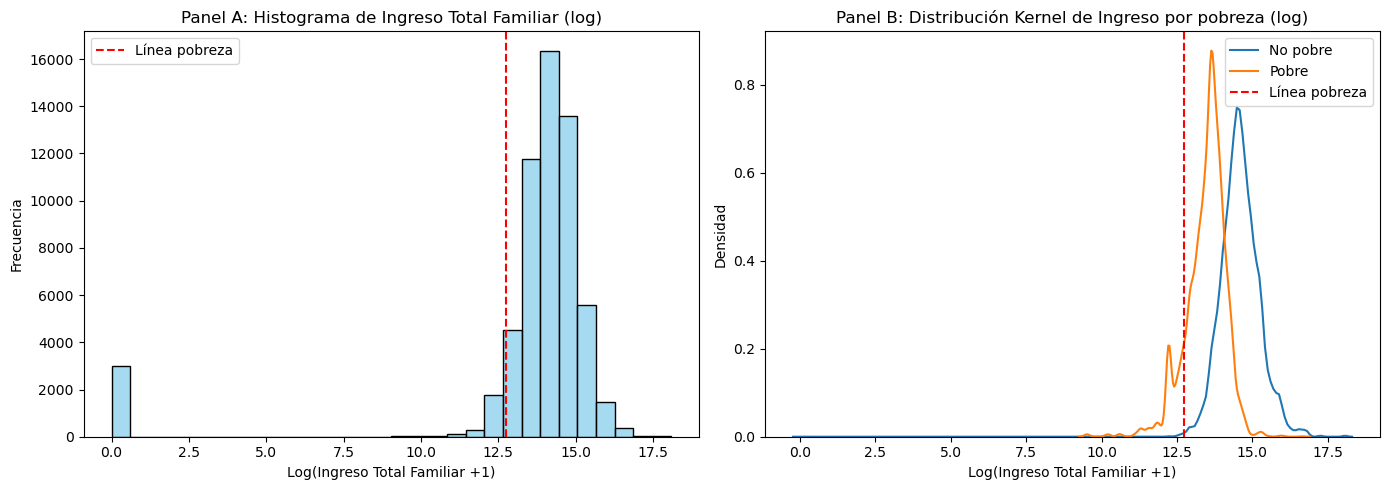

In [271]:
# Para evitar log(0), sumamos un valor pequeño si hay ceros
df_final['ITF_log'] = np.log1p(df_final['ingreso_total_familiar'])

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Panel A: histograma en log
sns.histplot(df_final['ITF_log'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].axvline(np.log1p(df_final['ingreso_necesario'].mean()), color='red', linestyle='--', label='Línea pobreza')
axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar (log)')
axes[0].set_xlabel('Log(Ingreso Total Familiar +1)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Panel B: densidad kernel en log
sns.kdeplot(data=df_final[df_final['POBRE']==0], x='ITF_log', label='No pobre', ax=axes[1])
sns.kdeplot(data=df_final[df_final['POBRE']==1], x='ITF_log', label='Pobre', ax=axes[1])
axes[1].axvline(np.log1p(df_final['ingreso_necesario'].mean()), color='red', linestyle='--', label='Línea pobreza')
axes[1].set_title('Panel B: Distribución Kernel de Ingreso por pobreza (log)')
axes[1].set_xlabel('Log(Ingreso Total Familiar +1)')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()

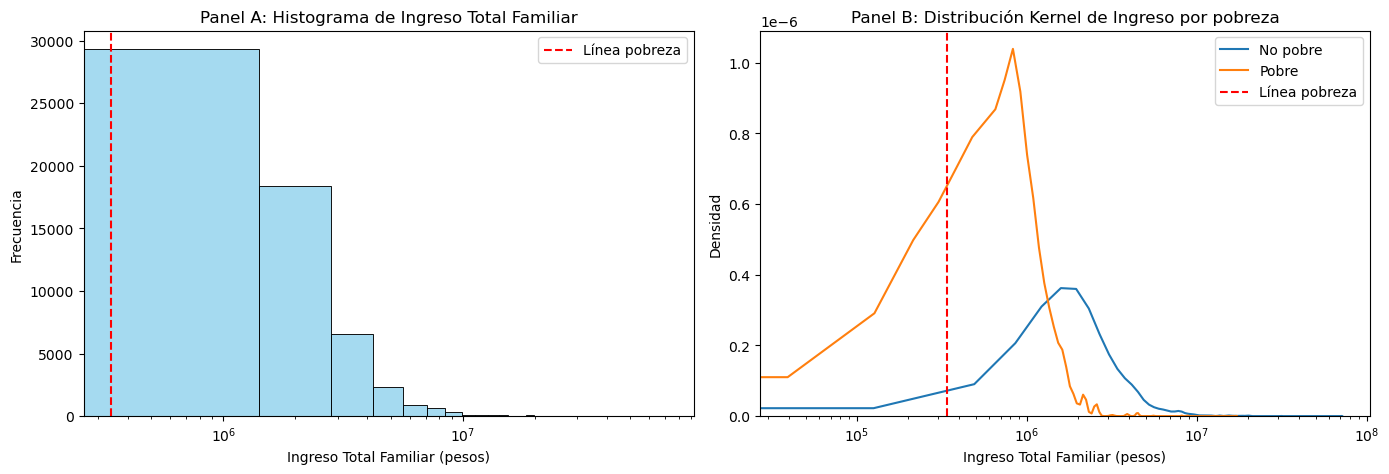

In [282]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Panel A: histograma log
sns.histplot(df_final['ingreso_total_familiar'], bins=50, kde=False, ax=axes[0], color='skyblue')
axes[0].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar')
axes[0].set_xlabel('Ingreso Total Familiar (pesos)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xscale('log')  # escala logaritmica real
axes[0].legend()

# Panel B: densidad kernel log
sns.kdeplot(data=df_final[df_final['POBRE']==0], x='ingreso_total_familiar', label='No pobre', ax=axes[1])
sns.kdeplot(data=df_final[df_final['POBRE']==1], x='ingreso_total_familiar', label='Pobre', ax=axes[1])
axes[1].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[1].set_title('Panel B: Distribución Kernel de Ingreso por pobreza')
axes[1].set_xlabel('Ingreso Total Familiar (pesos)')
axes[1].set_ylabel('Densidad')
axes[1].set_xscale('log')  # escala logaritmica real
axes[1].legend()

plt.tight_layout()
plt.show()

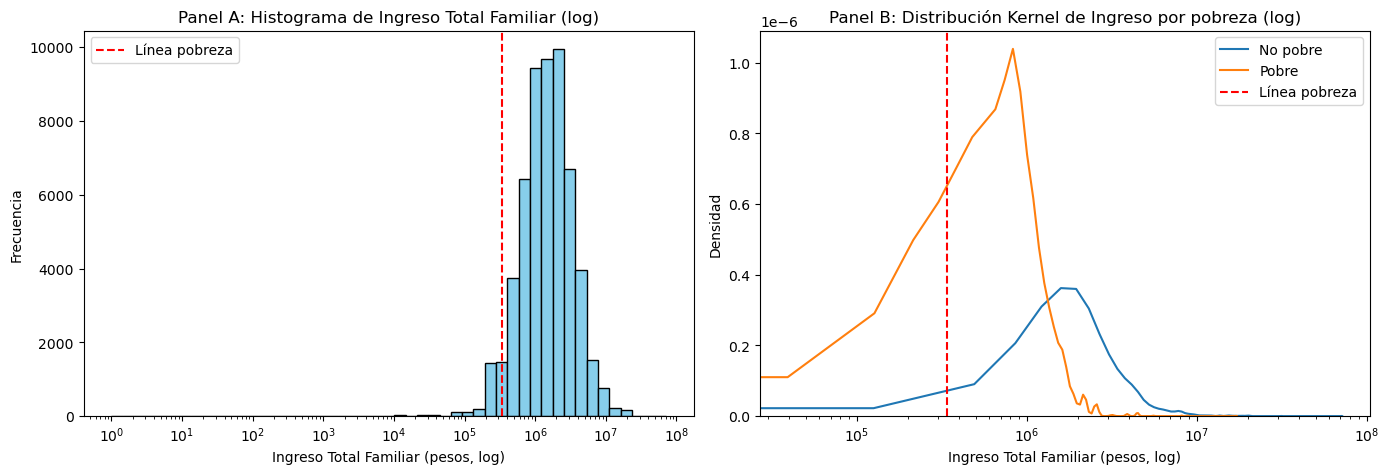

In [283]:
# Definir el rango de ingreso y bins logarítmicos
ingresos = df_final['ingreso_total_familiar']
bins_log = np.logspace(np.log10(ingresos.min()+1), np.log10(ingresos.max()), 50)  # 50 bins log

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Panel A: histograma con bins logarítmicos
axes[0].hist(ingresos, bins=bins_log, color='skyblue', edgecolor='black')
axes[0].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[0].set_xscale('log')
axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar (log)')
axes[0].set_xlabel('Ingreso Total Familiar (pesos, log)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Panel B: densidad kernel (log) por pobreza
sns.kdeplot(data=df_final[df_final['POBRE']==0], x='ingreso_total_familiar', label='No pobre', ax=axes[1])
sns.kdeplot(data=df_final[df_final['POBRE']==1], x='ingreso_total_familiar', label='Pobre', ax=axes[1])
axes[1].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[1].set_xscale('log')
axes[1].set_title('Panel B: Distribución Kernel de Ingreso por pobreza (log)')
axes[1].set_xlabel('Ingreso Total Familiar (pesos, log)')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.show()


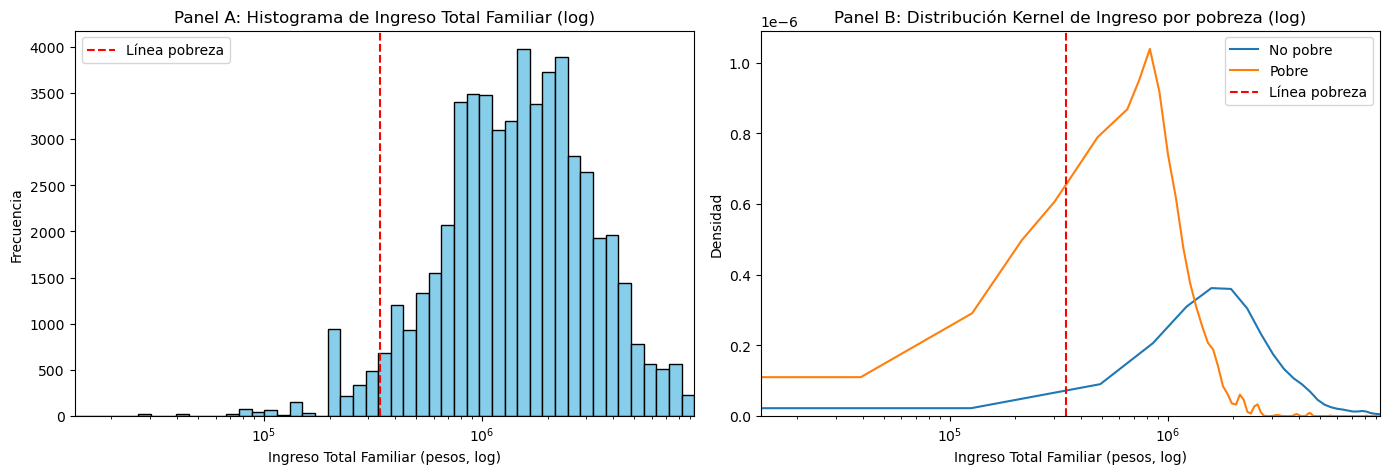

In [284]:
# Determinar mínimo ingreso positivo
min_ingreso = ingresos[ingresos > 0].min()

# Definir límite superior (percentil 99)
xmax = ingresos.quantile(0.99)

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Panel A: histograma con bins logarítmicos y límites ajustados
bins_log = np.logspace(np.log10(min_ingreso), np.log10(xmax), 50)  # 50 bins log
axes[0].hist(ingresos, bins=bins_log, color='skyblue', edgecolor='black')
axes[0].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[0].set_xscale('log')
axes[0].set_xlim(left=min_ingreso, right=xmax)
axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar (log)')
axes[0].set_xlabel('Ingreso Total Familiar (pesos, log)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Panel B: densidad kernel con mismos límites
sns.kdeplot(data=df_final[df_final['POBRE']==0], x='ingreso_total_familiar', label='No pobre', ax=axes[1])
sns.kdeplot(data=df_final[df_final['POBRE']==1], x='ingreso_total_familiar', label='Pobre', ax=axes[1])
axes[1].axvline(df_final['ingreso_necesario'].mean(), color='red', linestyle='--', label='Línea pobreza')
axes[1].set_xscale('log')
axes[1].set_xlim(left=min_ingreso, right=xmax)
axes[1].set_title('Panel B: Distribución Kernel de Ingreso por pobreza (log)')
axes[1].set_xlabel('Ingreso Total Familiar (pesos, log)')
axes[1].set_ylabel('Densidad')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(ruta_figuras, "histogramaKernelp3.png"), dpi=150, bbox_inches="tight")
plt.show()

In [285]:
print(df_final['ingreso_necesario'].head(10))

0    151.7518
1    365.0246
2    365.0246
3    365.0246
4    365.0246
5    365.0246
6    365.0246
7    365.0246
8    365.0246
9    365.0246
Name: ingreso_necesario, dtype: float64


In [286]:
#4.
# Crear variable horastrab solo para jefes de hogar
df_final['horastrab'] = 0  # inicializamos
mask_jefe = df_final['CH03'] == 1
df_final.loc[mask_jefe, 'horastrab'] = df_final.loc[mask_jefe, 'PP3E_TOT'] + df_final.loc[mask_jefe, 'PP3F_TOT']

In [287]:
# Limitar horas plausibles
df_final['horastrab'] = df_final['horastrab'].clip(upper=100)

# Estadística descriptiva con límite
desc_horas = df_final.loc[mask_jefe, 'horastrab'].describe(percentiles=[0.5])
print(desc_horas[['mean', 'std', 'min', '50%', 'max']])

mean     32.571630
std      25.837674
min       0.000000
50%      40.000000
max     100.000000
Name: horastrab, dtype: float64


In [288]:
# Lista de años a analizar
anios = [2005, 2025]

for year in anios:
    df_year = df_final[df_final['YEAR'] == year]
    
    total_obs = len(df_year)
    na_pobre = df_year['POBRE'].isna().sum()
    cant_pobres = df_year['POBRE'].sum()  # 1 = pobre
    cant_no_pobres = (df_year['POBRE']==0).sum()
    
    # Cantidad de variables limpias y homogenizadas
    # Consideramos variables sin NAs en ese año
    variables_limpias = df_year.drop(columns=['YEAR']).dropna(axis=1).shape[1]
    
    print(f"Año {year}:")
    print(f"  Cantidad de observaciones: {total_obs}")
    print(f"  Observaciones con NA en POBRE: {na_pobre}")
    print(f"  Cantidad de pobres: {cant_pobres}")
    print(f"  Cantidad de no pobres: {cant_no_pobres}")
    print(f"  Cantidad de variables limpias y homogenizadas: {variables_limpias}\n")


Año 2005:
  Cantidad de observaciones: 40969
  Observaciones con NA en POBRE: 112
  Cantidad de pobres: 14356.0
  Cantidad de no pobres: 26501
  Cantidad de variables limpias y homogenizadas: 175

Año 2025:
  Cantidad de observaciones: 17968
  Observaciones con NA en POBRE: 2890
  Cantidad de pobres: 5969.0
  Cantidad de no pobres: 9109
  Cantidad de variables limpias y homogenizadas: 73



In [289]:
print(df_final.columns.tolist())

['ID', 'ADECCFR', 'ADECIFR', 'ADECINDR', 'ADECOCUR', 'AGLOMERADO', 'CAT_INAC', 'CAT_OCUP', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'COMPONENTE', 'DECCFR', 'DECIFR', 'DECINDR', 'DECOCUR', 'ESTADO', 'GDECCFR', 'GDECIFR', 'GDECINDR', 'GDECOCUR', 'H15', 'IDECCFR', 'IDECIFR', 'IDECINDR', 'IDECOCUR', 'INTENSI', 'IPCF', 'ITF', 'MAS_500', 'NIVEL_ED', 'NRO_HOGAR', 'P21', 'P47T', 'PDECCFR', 'PDECIFR', 'PDECINDR', 'PDECOCUR', 'PONDERA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'PP04A', 'PP04B1', 'PP04B2', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04B3_MES', 'PP04B_COD', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05B2_MES', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'P

In [290]:
# Revisar nombres de columnas disponibles
print([col for col in df_final.columns if "IX" in col or "hora" in col.lower()])

['horastrab']


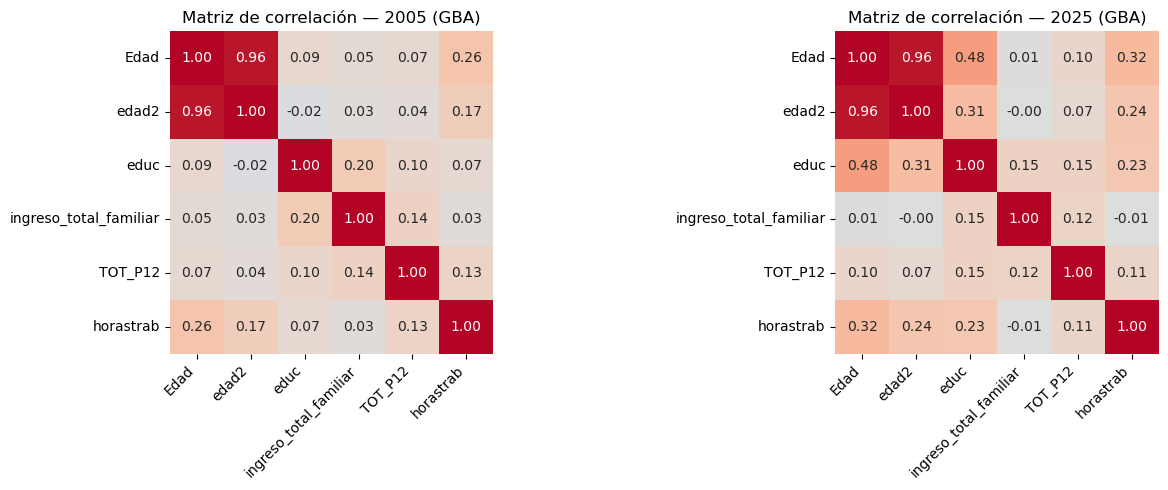

Figura guardada en Figuras2\corr_6vars_2005_2025.png


In [291]:
# Parte II – Paso 1: dataset con 6 predictores
# Variables: edad, edad2, educ, ingreso_total_familiar (ITF),
#            número de miembros del hogar (TOT_P12),
#            horastrab (para jefes de hogar)
# ============================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# --- 1) Asegurar que existe 'horastrab' ---
# Si no existe, la creamos como PP3E_TOT + PP3F_TOT SOLO para jefes de hogar (CH03 == 1)
if 'horastrab' not in df_final.columns:
    # Inicializamos en NaN
    df_final['horastrab'] = np.nan

    # Máscara de jefes de hogar
    mask_jefe = df_final['CH03'] == 1

    # Sumamos horas de ocupación principal y secundaria (cuando existan)
    # Si alguna no está, las tratamos como 0
    horas_princ = 0
    horas_sec   = 0
    if 'PP3E_TOT' in df_final.columns:
        horas_princ = df_final.loc[mask_jefe, 'PP3E_TOT'].fillna(0)
    if 'PP3F_TOT' in df_final.columns:
        horas_sec   = df_final.loc[mask_jefe, 'PP3F_TOT'].fillna(0)

    # Asignamos la suma a los jefes
    df_final.loc[mask_jefe, 'horastrab'] = horas_princ + horas_sec

    # Acotamos a valores plausibles (0–100 hs/sem)
    df_final['horastrab'] = df_final['horastrab'].clip(lower=0, upper=100)

# --- 2) Confirmar columna de tamaño del hogar ---
# En tu base la columna homogeneizada es TOT_P12
col_hogar = 'TOT_P12'
if col_hogar not in df_final.columns:
    raise ValueError("No encuentro la columna de tamaño del hogar (TOT_P12).")

# --- 3) Armar la lista de variables pedidas ---
variables = ['Edad', 'edad2', 'educ', 'ingreso_total_familiar', col_hogar, 'horastrab']

# Verificamos que todas existan antes de seleccionar
faltan = [v for v in variables if v not in df_final.columns]
if len(faltan) > 0:
    raise ValueError(f"Faltan columnas en df_final: {faltan}")

# Subset final para métodos no supervisados
df_vars = df_final[variables + ['YEAR']].copy()

# --- 4) Limpieza mínima para correlaciones ---
# Nos quedamos con filas con datos en las 6 variables
df_vars_clean = df_vars.dropna(subset=variables)

# --- 5) Matrices de correlación por año (2005 y 2025) ---
corr_2005 = df_vars_clean.loc[df_vars_clean['YEAR'] == 2005, variables].corr()
corr_2025 = df_vars_clean.loc[df_vars_clean['YEAR'] == 2025, variables].corr()

# --- 6) Gráfico comparativo prolijo ---
plt.figure(figsize=(14, 5))

# Heatmap 2005
ax1 = plt.subplot(1, 2, 1)
sns.heatmap(corr_2005, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f",
            square=True, cbar=False, ax=ax1)
ax1.set_title("Matriz de correlación — 2005 (GBA)")

# eje X con etiquetas rotadas y alineadas
ax1.tick_params(axis='x', labelrotation=45)  
plt.setp(ax1.get_xticklabels(), ha='right')  

# eje Y sin rotación
ax1.tick_params(axis='y', labelrotation=0) 

# Heatmap 2025
ax2 = plt.subplot(1, 2, 2)
sns.heatmap(corr_2025, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f",
            square=True, cbar=False, ax=ax2)

ax2.set_title("Matriz de correlación — 2025 (GBA)")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()

# Guardar figura
CARPETA_FIG = "Figuras2"  # o la carpeta que estés usando
os.makedirs(CARPETA_FIG, exist_ok=True)
plt.savefig(os.path.join(CARPETA_FIG, "corr_6vars_2005_2025.png"), dpi=150, bbox_inches="tight")
plt.show()
print(f"Figura guardada en {os.path.join(CARPETA_FIG, 'corr_6vars_2005_2025.png')}")

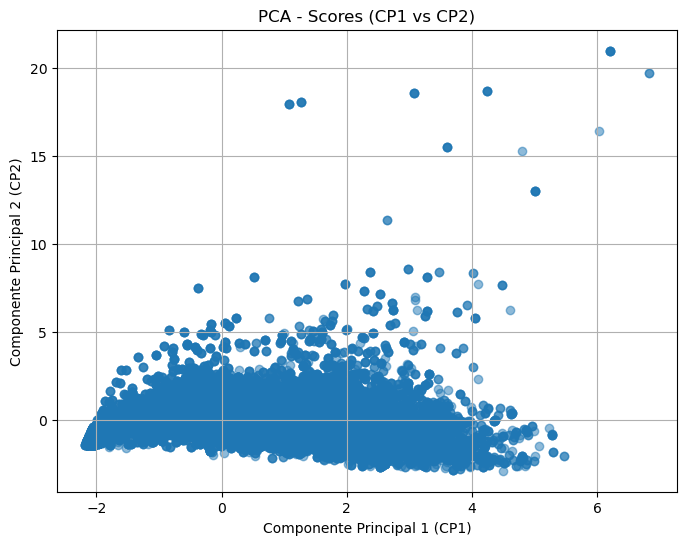

Varianza explicada por cada componente: [0.35398508 0.19738327 0.16173407 0.14889998 0.13343562 0.00456198]
Varianza acumulada: [0.35398508 0.55136835 0.71310243 0.8620024  0.99543802 1.        ]


In [292]:
# PARTE A. PCA

# 2. PCA con ingreso: Aplicamos PCA a las 6 variables: Edad, edad2, educ, ingreso_total_familiar, horastrab y col_hogar

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Primero definimos las variables
variables = ["Edad", "edad2", "educ", "ingreso_total_familiar", "horastrab", col_hogar]

# Seleccionamos solo esas columnas
df_vars = df_final[variables].dropna().copy()

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_vars)

# PCA
pca = PCA()
scores = pca.fit_transform(X_scaled)

# Hacemos el gráfico CP1 vs CP2
plt.figure(figsize=(8,6))
plt.scatter(scores[:,0], scores[:,1], alpha=0.5)
plt.xlabel("Componente Principal 1 (CP1)")
plt.ylabel("Componente Principal 2 (CP2)")
plt.title("PCA - Scores (CP1 vs CP2)")
plt.grid(True)


# Guardar en la carpeta Figuras2
plt.savefig("Figuras2/PCA_scores_CP1_CP2.png", dpi=300, bbox_inches="tight")

plt.show()

# Varianza explicada 
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada:", pca.explained_variance_ratio_.cumsum())

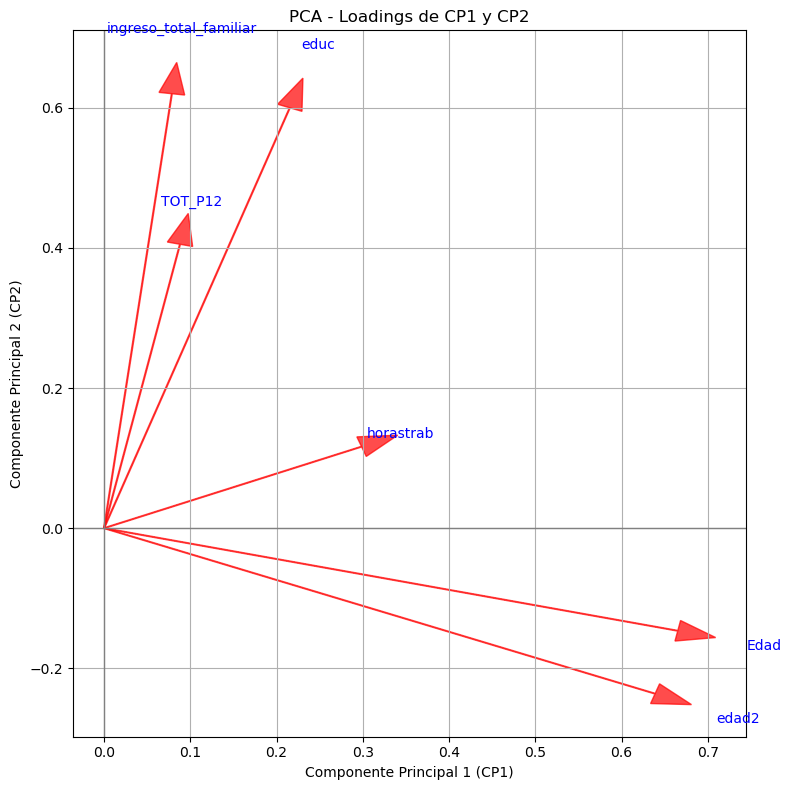

In [293]:
# 3. Gráfico con los ponderadores (loadings) para CP1 y CP2

# Obtenemos los loadings (cada fila es un componente, cada columna una variable)
loadings = pca.components_

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 8))

# Graficamos los puntos (scores ya no, ahora son los vectores de cada variable)
for i, var in enumerate(df_vars.columns):
    ax.arrow(0, 0, 
             loadings[0, i], loadings[1, i], 
             color='r', alpha=0.7, head_width=0.03)
    ax.text(loadings[0, i]*1.15, loadings[1, i]*1.15, var, color='b', ha='center', va='center')

# Detalles del gráfico
ax.set_xlabel("Componente Principal 1 (CP1)")
ax.set_ylabel("Componente Principal 2 (CP2)")
ax.set_title("PCA - Loadings de CP1 y CP2")
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
ax.grid(True)

plt.tight_layout()

# Guardamos la figura
plt.savefig("Figuras2/loadings_pca.png", dpi=150, bbox_inches="tight")
plt.show()

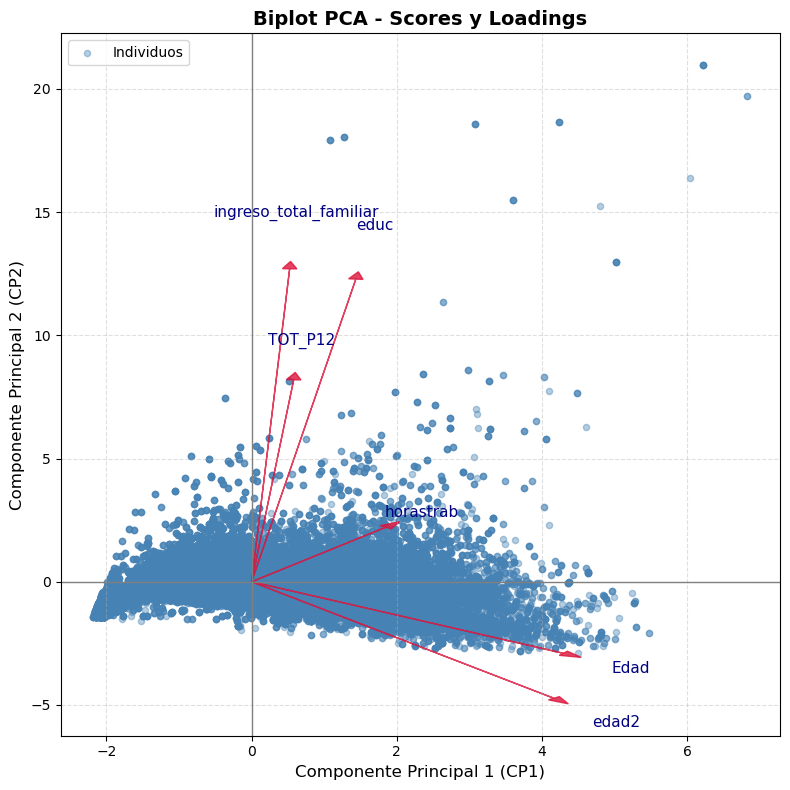

In [294]:
# Mejor queremos hacer las flechas pero sobre el scatterplot del PCA que hicimos antes (queda más lindo y se entiende más que solo las flechas). 

fig, ax = plt.subplots(figsize=(8, 8))

# Graficamos los scores (observaciones)
ax.scatter(scores[:, 0], scores[:, 1], alpha=0.4, color="steelblue", s=20, label="Individuos")

# Agregamos los loadings (flechas)
for i, var in enumerate(df_vars.columns):
    ax.arrow(0, 0, 
             loadings[0, i]*max(scores[:,0]), loadings[1, i]*max(scores[:,1]), 
             color="crimson", alpha=0.8, 
             head_width=0.2, length_includes_head=True)
    
    # Etiqueta un poco más alejada de la punta
    ax.text(loadings[0, i]*max(scores[:,0])*1.15, 
            loadings[1, i]*max(scores[:,1])*1.15, 
            var, color="navy", fontsize=11, 
            ha="center", va="center")

# Detalles 
ax.set_xlabel("Componente Principal 1 (CP1)", fontsize=12)
ax.set_ylabel("Componente Principal 2 (CP2)", fontsize=12)
ax.set_title("Biplot PCA - Scores y Loadings", fontsize=14, fontweight="bold")
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
ax.grid(True, linestyle="--", alpha=0.4)

plt.legend()
plt.tight_layout()

# Guardamos figura en la carpeta
plt.savefig("Figuras2/biplot_pca.png", dpi=150, bbox_inches="tight")
plt.show()

   Componente  Proporción  Acumulada
0           1       0.354      0.354
1           2       0.197      0.551
2           3       0.162      0.713
3           4       0.149      0.862
4           5       0.133      0.995
5           6       0.005      1.000


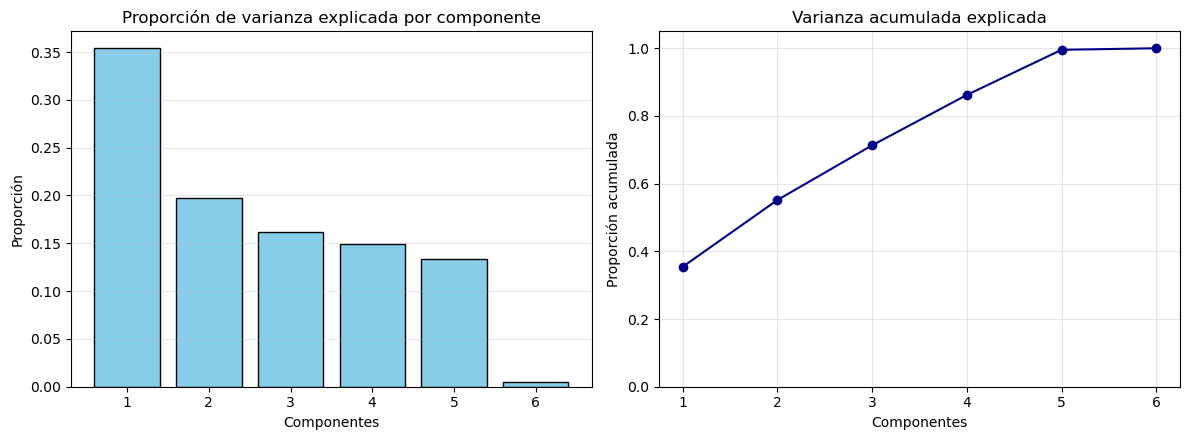

In [295]:
# 4. Gráfico de la proporción de varianza explicada para cada uno de los componentes

# Obtenemos la proporción de varianza explicada y la acumulada
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
ticks = np.arange(1, len(var_exp)+1)

# Creamos un DataFrame para poner en el informe la tabla con los valores exactos 
tabla_varianza = pd.DataFrame({
    "Componente": ticks,
    "Proporción": np.round(var_exp, 3),
    "Acumulada": np.round(cum_var_exp, 3)
})
print(tabla_varianza) #estos valores los ponemos en el informe escrito

# Para que se guarde
save_dir = ruta_figuras if 'ruta_figuras' in globals() else "Figuras2"
os.makedirs(save_dir, exist_ok=True)

# Gráfico de varianza explicada
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

# Proporción individual
axes[0].bar(ticks, var_exp, color="skyblue", edgecolor="black")
axes[0].set_title("Proporción de varianza explicada por componente")
axes[0].set_xlabel("Componentes")
axes[0].set_ylabel("Proporción")
axes[0].set_xticks(ticks)
axes[0].grid(axis="y", alpha=0.3)

# Varianza acumulada
axes[1].plot(ticks, cum_var_exp, marker="o", color="darkblue")
axes[1].set_title("Varianza acumulada explicada")
axes[1].set_xlabel("Componentes")
axes[1].set_ylabel("Proporción acumulada")
axes[1].set_xticks(ticks)
axes[1].set_ylim(0, 1.05)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "pca_varianza_explicada.png"), dpi=150, bbox_inches="tight")
plt.show()

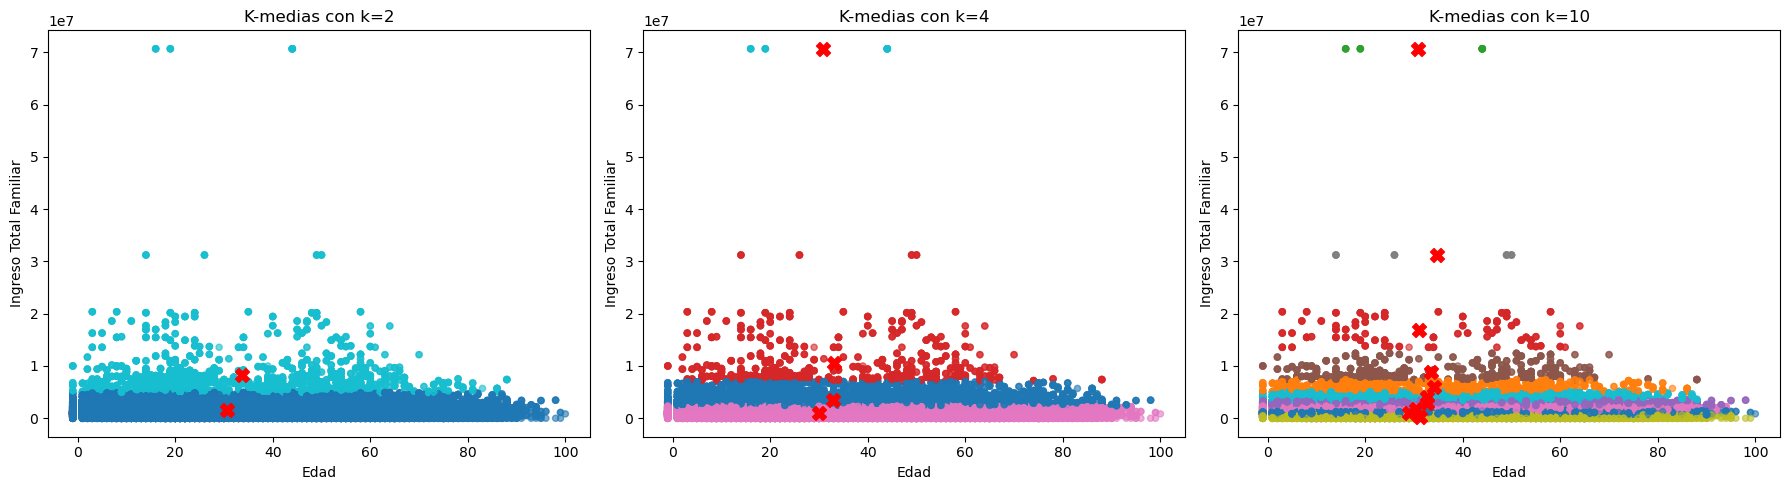

In [296]:
# PARTE B: Cluster

# 5. Cluster k-medias

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Dataset con solo Edad e Ingreso
X = df_final[['Edad', 'ingreso_total_familiar']].dropna()

# Valores de k a probar (los que se pide en el tp)
ks = [2, 4, 10]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(ks):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42) #n_init = 20 tb lo pide la consigna  
    clusters = kmeans.fit_predict(X)
    
    axes[i].scatter(X['Edad'], X['ingreso_total_familiar'],
                    c=clusters, cmap='tab10', alpha=0.6, s=20)
    
    # Centroides
    centers = kmeans.cluster_centers_
    axes[i].scatter(centers[:,0], centers[:,1], c='red', s=100, marker='X')
    
    axes[i].set_title(f"K-medias con k={k}")
    axes[i].set_xlabel("Edad")
    axes[i].set_ylabel("Ingreso Total Familiar")

plt.tight_layout()
plt.savefig(os.path.join(save_dir, "Gráfico_ClusterK-medias"), dpi=150, bbox_inches="tight")
plt.show()

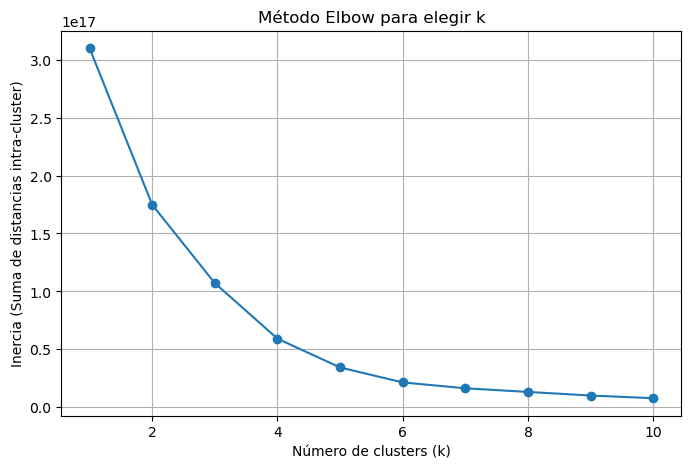

In [297]:
from sklearn.cluster import KMeans

# Primero seleccionamos las variables a clusterizar
X = df_final[['Edad', 'ingreso_total_familiar']].dropna()

# Calcular inercia para distintos k 
inertias = []
K = range(1, 11)  # de k =1 a k = 10

for k in K:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar curva del codo 
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (Suma de distancias intra-cluster)")
plt.title("Método Elbow para elegir k")
plt.grid(True)

# Guardar en carpeta Figuras2
plt.savefig("Figuras2/elbow_kmeans.png", dpi=150, bbox_inches="tight")
plt.show()

C:\Users\Justina Rivero A\AppData\Local\Temp\ipykernel_11336\2690626870.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(min(n_por_estrato, len(g)), random_state=123))


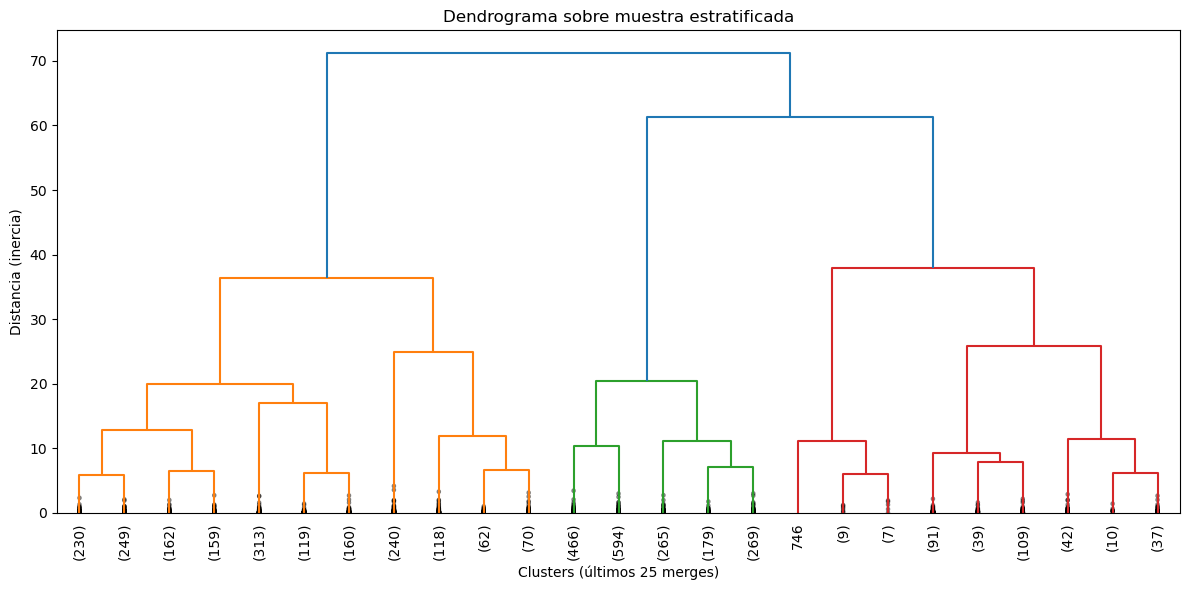

In [298]:
# 6. 

# Armamos base con las mismas 2 variables y (opcional) el estrato POBRE ---
base = df_final[['Edad', 'ingreso_total_familiar', 'POBRE']].dropna().copy()

# Tomamos una muestra estratificada por POBRE para no sesgar la distribución 
# cantidad máxima por estrato (ajustá según tu RAM; 1500-3000 suele andar bien)
# esto lo hacemos porque antes tiraba un MemoryError - decía que intentó reservar 12.9 GiB)

n_por_estrato = 2000 
muestra = (base.groupby('POBRE', group_keys=False)
                 .apply(lambda g: g.sample(min(n_por_estrato, len(g)), random_state=123))
                 .reset_index(drop=True))

# Estandarizamos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(muestra[['Edad', 'ingreso_total_familiar']])

# Clustering jerárquico + dendrograma 
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import os

Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
# 'lastp' muestra sólo los últimos p merges (xa evita bosque de ramas)
dendrogram(Z, truncate_mode='lastp', p=25, leaf_rotation=90, show_contracted=True)
plt.title("Dendrograma sobre muestra estratificada")
plt.xlabel("Clusters (últimos 25 merges)")
plt.ylabel("Distancia (inercia)")

# Guardar
carpeta = ruta_figuras if 'ruta_figuras' in globals() else "Figuras2"
os.makedirs(carpeta, exist_ok=True)
plt.tight_layout()
plt.savefig(os.path.join(carpeta, "dendrograma_muestra_ward.png"), dpi=150, bbox_inches="tight")
plt.show()